<a href="https://colab.research.google.com/github/GaetanAm/Master-1-Machine-Learning/blob/main/notebooks/Tutorial1_ML_Asset_Mgt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



# 1 - Data

In [4]:
# Define the main path
mainpath = "https://raw.githubusercontent.com/GaetanAm/Master-1-Machine-Learning/refs/heads/main/data/"
# Load the data
all_assets_prices = pd.read_csv(f"{mainpath}DataForStatsTutorial1.csv", index_col=0, sep=";", parse_dates=True, dayfirst=True)

all_assets_prices.head()

,DMEquitiesCAD,DMEquitiesFRF,DMEquitiesDEM,DMEquitiesJPY,DMEquitiesCHF,DMEquitiesGBP,DMEquitiesUSD,DMEquitiesEUR,DMEquitiesNDQ,DMFXEUR,DMFXGBP,DMFXJPY,DMFXCHF,BondsDEM,BondsFRF,BondsGBP,BondsUSD
Dates,,,,,,,,,,,,,,,,,
2000-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2000-01-04,0.976075,0.958445,0.975642,0.997246,0.960050,0.961770,0.961524,0.960624,0.925347,1.014570,1.007270,0.984770,1.015759,0.990356,0.998274,0.986431,1.005638
2000-01-05,0.964725,0.925859,0.962979,0.959131,0.948539,0.942857,0.963296,0.936774,0.913641,1.017907,1.009551,0.976201,1.018792,0.992099,0.998546,0.979462,0.996842
2000-01-06,0.960085,0.920773,0.958869,0.934596,0.961604,0.929909,0.964249,0.928391,0.861620,1.018980,1.014851,0.963130,1.019079,0.989268,0.999565,0.979061,1.000719
2000-01-07,1.001680,0.935809,1.004101,0.928449,0.983673,0.938045,0.990207,0.958920,0.926518,1.012964,1.008818,0.961080,1.011797,0.993004,0.998714,0.983295,1.004965


# 2 - Data Exploration

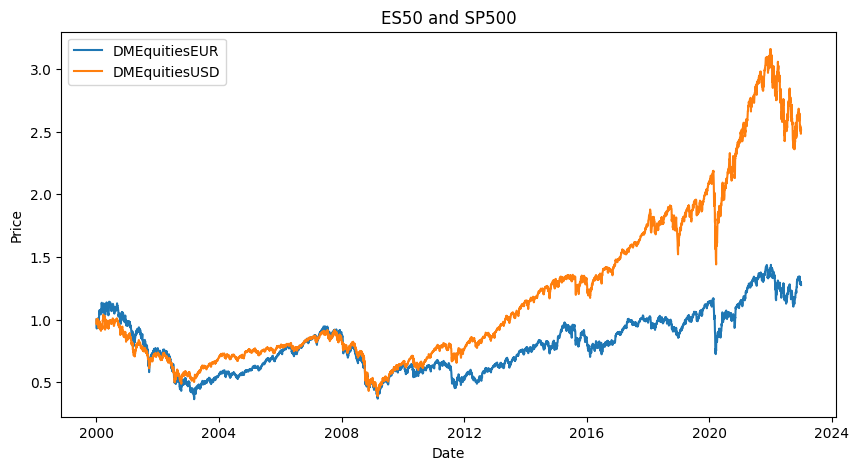

In [9]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(all_assets_prices[['DMEquitiesEUR', 'DMEquitiesUSD']])
plt.title("ES50 and SP500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['DMEquitiesEUR', 'DMEquitiesUSD'])
plt.show()

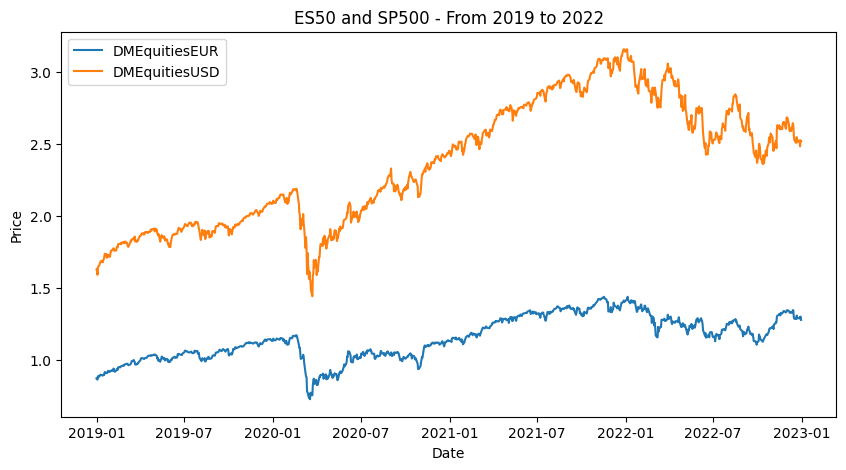

In [10]:
# Plot a subset of the data
subset = all_assets_prices.loc['2019':'2022', ['DMEquitiesEUR', 'DMEquitiesUSD']]
plt.figure(figsize=(10, 5))
plt.plot(subset)
plt.title("ES50 and SP500 - From 2019 to 2022")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(['DMEquitiesEUR', 'DMEquitiesUSD'])
plt.show()

In [12]:
# Change frequency
all_assets_prices_daily = all_assets_prices
all_assets_prices_weekly = all_assets_prices.resample('W').last()
all_assets_prices_monthly = all_assets_prices.resample('ME').last()

# Display the first few rows of each DataFrame
print("Daily Prices Head:")
print(all_assets_prices_daily.head())
print("\nWeekly Prices Head:")
print(all_assets_prices_weekly.head())
print("\nMonthly Prices Head:")
print(all_assets_prices_monthly.head())

Daily Prices Head:
            DMEquitiesCAD  DMEquitiesFRF  DMEquitiesDEM  DMEquitiesJPY  \
Dates                                                                    
2000-01-03       1.000000       1.000000       1.000000       1.000000   
2000-01-04       0.976075       0.958445       0.975642       0.997246   
2000-01-05       0.964725       0.925859       0.962979       0.959131   
2000-01-06       0.960085       0.920773       0.958869       0.934596   
2000-01-07       1.001680       0.935809       1.004101       0.928449   

            DMEquitiesCHF  DMEquitiesGBP  DMEquitiesUSD  DMEquitiesEUR  \
Dates                                                                    
2000-01-03       1.000000       1.000000       1.000000       1.000000   
2000-01-04       0.960050       0.961770       0.961524       0.960624   
2000-01-05       0.948539       0.942857       0.963296       0.936774   
2000-01-06       0.961604       0.929909       0.964249       0.928391   
2000-01-07       0

In [13]:
# Function to compute returns from prices
def compute_return(price):
    ret = price / price.shift(1) - 1
    return ret

# Example: Calculate returns for SP500
prices_sp = all_assets_prices_daily['DMEquitiesUSD']
returns_sp = compute_return(prices_sp)

# Compare with the pct_change function
returns_sp_check = prices_sp.pct_change()

# Display the first few returns
print("\nReturns SP Head:")
print(returns_sp.head())


Returns SP Head:
Dates
2000-01-03         NaN
2000-01-04   -0.038476
2000-01-05    0.001843
2000-01-06    0.000989
2000-01-07    0.026921
Name: DMEquitiesUSD, dtype: float64


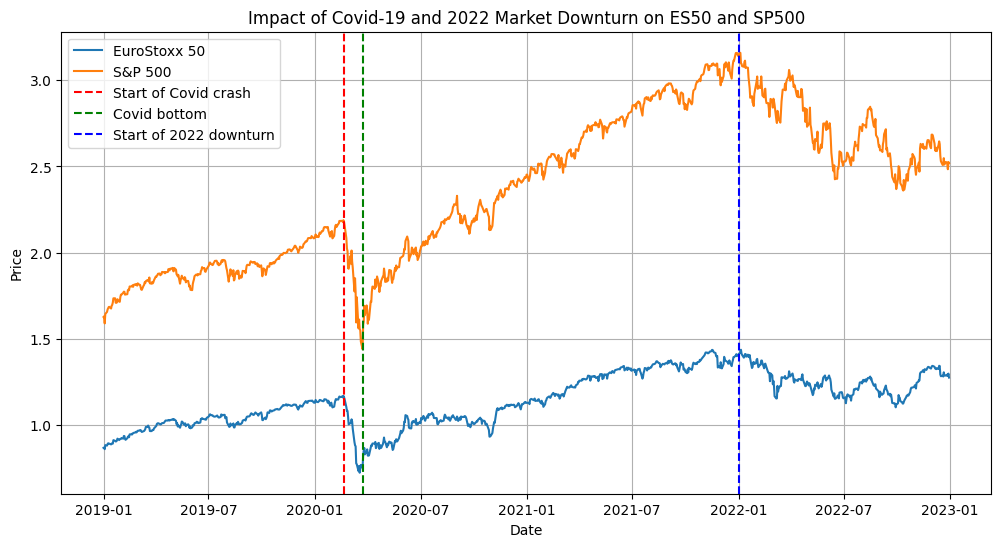

In [16]:
# Select the period from 2019 to 2022
subset_covid = all_assets_prices.loc['2019':'2022', ['DMEquitiesEUR', 'DMEquitiesUSD']]

plt.figure(figsize=(12, 6))
plt.plot(subset_covid, label=['EuroStoxx 50', 'S&P 500'])

#
plt.axvline(x=pd.Timestamp('2020-02-20'), color='r', linestyle='--', label='Start of Covid crash')
plt.axvline(x=pd.Timestamp('2020-03-23'), color='g', linestyle='--', label='Covid bottom')
plt.axvline(x=pd.Timestamp('2022-01-01'), color='b', linestyle='--', label='Start of 2022 downturn')

plt.title("Impact of Covid-19 and 2022 Market Downturn on ES50 and SP500")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()


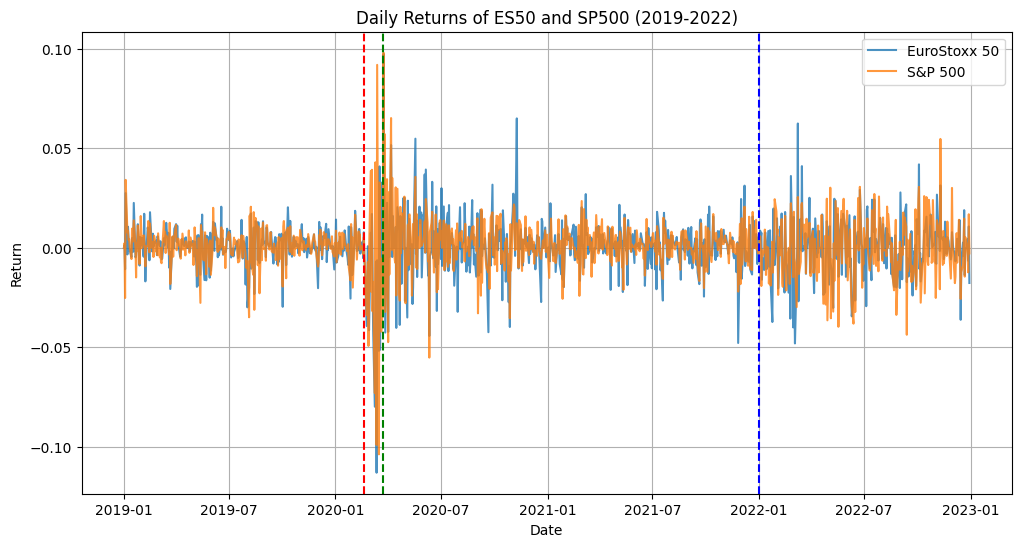

In [24]:
# Compute daily returns
returns_covid = compute_return(all_assets_prices[['DMEquitiesEUR', 'DMEquitiesUSD']]).loc['2019':'2022']

plt.figure(figsize=(12, 6))
plt.plot(returns_covid, alpha=0.8)

plt.axvline(x=pd.Timestamp('2020-02-20'), color='r', linestyle='--', label='Start of Covid crash')
plt.axvline(x=pd.Timestamp('2020-03-23'), color='g', linestyle='--', label='Covid bottom')
plt.axvline(x=pd.Timestamp('2022-01-01'), color='b', linestyle='--', label='Start of 2022 downturn')

plt.title("Daily Returns of ES50 and SP500 (2019-2022)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend(['EuroStoxx 50', 'S&P 500'])
plt.grid()
plt.show()

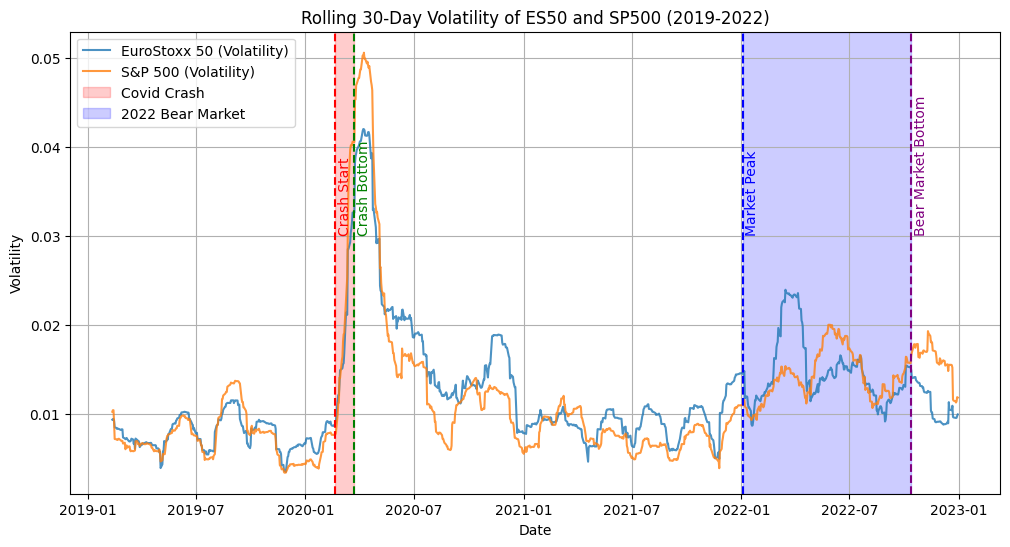

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute daily returns
returns_covid = compute_return(all_assets_prices[['DMEquitiesEUR', 'DMEquitiesUSD']]).loc['2019':'2022']

# Compute rolling 30-day volatility
rolling_volatility = returns_covid.rolling(window=30).std()

plt.figure(figsize=(12, 6))

# Plot rolling volatility instead of raw daily returns
plt.plot(rolling_volatility, label=['EuroStoxx 50 (Volatility)', 'S&P 500 (Volatility)'], alpha=0.8)

# Highlight Covid-19 crash period
plt.axvspan(pd.Timestamp('2020-02-20'), pd.Timestamp('2020-03-23'), color='red', alpha=0.2, label="Covid Crash")

# Annotate Covid crash points
plt.axvline(x=pd.Timestamp('2020-02-20'), color='r', linestyle='--')
plt.text(pd.Timestamp('2020-02-20') + pd.Timedelta(days=5), rolling_volatility.max().max() * 0.6, "Crash Start", rotation=90, color='r')

plt.axvline(x=pd.Timestamp('2020-03-23'), color='g', linestyle='--')
plt.text(pd.Timestamp('2020-03-23') + pd.Timedelta(days=5), rolling_volatility.max().max() * 0.6, "Crash Bottom", rotation=90, color='g')

# Highlight 2022 bear market period (January - October)
plt.axvspan(pd.Timestamp('2022-01-03'), pd.Timestamp('2022-10-12'), color='blue', alpha=0.2, label="2022 Bear Market")

# Annotate 2022 bear market points
plt.axvline(x=pd.Timestamp('2022-01-03'), color='b', linestyle='--')
plt.text(pd.Timestamp('2022-01-03') + pd.Timedelta(days=5), rolling_volatility.max().max() * 0.6, "Market Peak", rotation=90, color='b')

plt.axvline(x=pd.Timestamp('2022-10-12'), color='purple', linestyle='--')
plt.text(pd.Timestamp('2022-10-12') + pd.Timedelta(days=5), rolling_volatility.max().max() * 0.6, "Bear Market Bottom", rotation=90, color='purple')

plt.title("Rolling 30-Day Volatility of ES50 and SP500 (2019-2022)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid()

plt.show()


# 3 - Usual stats

In [33]:
# Function to compute Compound Annual Growth Rate (CAGR)
def compute_cagr(price, ann_multiple=252):
    n = len(price)
    cagr = (price.iloc[-1] / price.iloc[0]) ** (ann_multiple / n) - 1
    return cagr

# Example: Calculate CAGR for SP500
cagr_sp = compute_cagr(all_assets_prices['DMEquitiesUSD'])
print(f'CAGR of SP 500 is: {round(cagr_sp * 100, 2)}%')

CAGR of SP 500 is: 3.96%


In [35]:
# Function to compute Volatility
def compute_vol(price, ann_multiple=252):
    ret = price / price.shift(1) - 1  # Calculate returns
    n = len(price)  # Get the length of the time series
    mu =ret.mean()  # Calculate the mean
    sigma_daily = np.sqrt((ret**2).sum() / (n - 1))  # Calculate daily volatility
    sigma = np.sqrt(ann_multiple) * sigma_daily  # Annualize the volatility
    return sigma

# Example: Calculate Volatility for SP500
vol_sp = compute_vol(all_assets_prices['DMEquitiesUSD'])
print(f'Volatility of SP 500 is: {round(vol_sp * 100, 2)}%')

Volatility of SP 500 is: 19.48%


In [37]:
# Comparing with the std function
sp_returns = all_assets_prices['DMEquitiesUSD'].pct_change()
vol_sp_check = np.sqrt(252)*all_assets_prices['DMEquitiesUSD'].pct_change().std()
print(f'Volatility of SP 500 is: {round(vol_sp_check * 100, 2)}%')

Volatility of SP 500 is: 19.47%


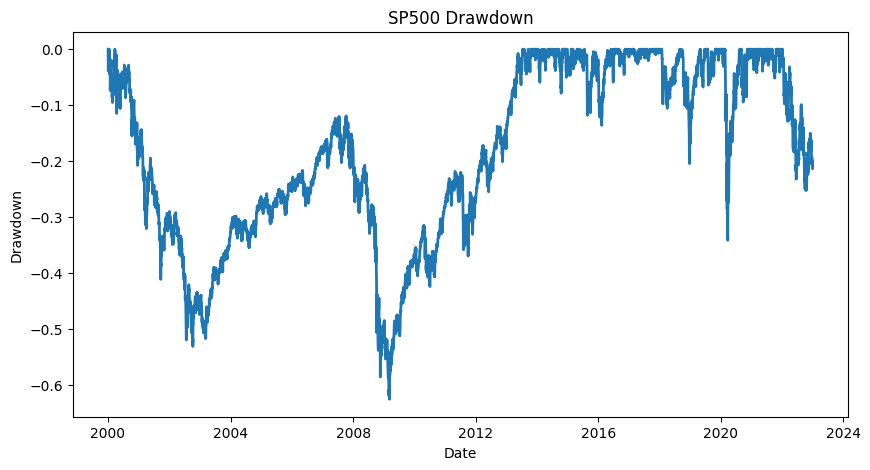

Max Drawdown of SP 500 = -62.63%
Max Drawdown of SP 500 = -62.63%


In [38]:
# Function to compute Drawdown
def compute_dd_np(price):
    price = price.values  # Convert to numpy array
    drawdown = price / np.maximum.accumulate(price) - 1  # Calculate drawdown
    return drawdown

def compute_dd_pd(df,series):  # NOT GOOD TO FOR USE IN FINANCE
    # Cumulative returns
    series_to_retain = df[series]
    out_df = pd.DataFrame()
    out_df[series] = series_to_retain
    out_df['Cumulative'] = out_df / out_df.iloc[0]
    # Maximum value up to each point
    out_df['Max'] = out_df['Cumulative'].cummax()
    # DD
    out_df['Drawdown'] = (out_df['Cumulative'] - out_df['Max']) / out_df['Max']
    return out_df

# Example: Calculate Drawdown for SP500
dd_np = compute_dd_np(all_assets_prices['DMEquitiesUSD'])  # Calculate drawdowns with numpy
dd_df = compute_dd_pd(all_assets_prices,'DMEquitiesUSD')  # Calculate drawdowns wih pandas

plt.figure(figsize=(10, 5))
plt.plot(dd_df.Drawdown, linewidth=2)
plt.title("SP500 Drawdown")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.show()

mdd = np.min(dd_np)  # Max drawdown
print(f"Max Drawdown of SP 500 = {round(mdd * 100, 2)}%")
print(f"Max Drawdown of SP 500 = {round(dd_df.Drawdown.min() * 100, 2)}%")

In [39]:
# Function to compute Sharpe Ratio
def compute_sr(price, ret_without_risk=0.00, ann_multiple=252):
    cagr = compute_cagr(price, ann_multiple)  # CAGR
    vol = compute_vol(price, ann_multiple)  # Volatility
    sr = (cagr - ret_without_risk) / vol
    return sr

# Example: Calculate Sharpe Ratio for SP500
rf = 0.02  # Risk-free rate
sr = compute_sr(all_assets_prices['DMEquitiesUSD'], rf, 252)  # Sharpe Ratio
print(f"Sharpe Ratio of SP 500 = {round(sr, 2)}")

Sharpe Ratio of SP 500 = 0.1


Sharpe Ratio of SP500 Index (2000-2007) = -0.23
Sharpe Ratio of SP500 Index (2008-2009) = -0.41
Sharpe Ratio of SP500 Index (2010-2022) = 0.49


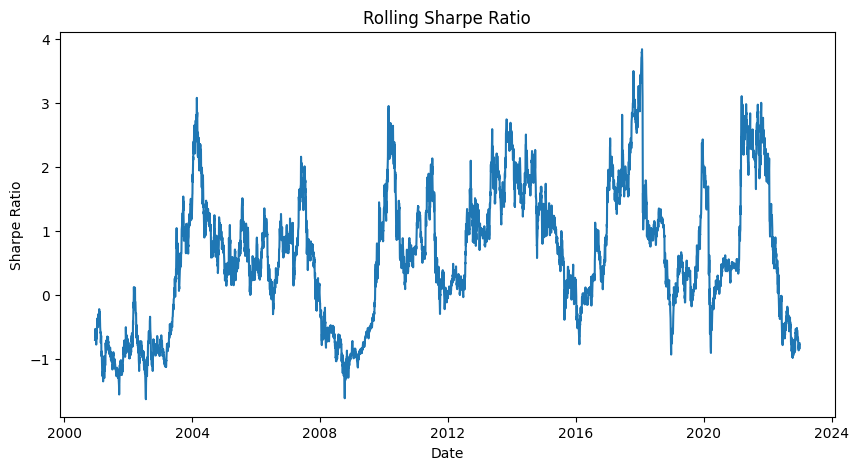

In [41]:
# Examples to get subsets
prix_sp_subset1 = all_assets_prices['DMEquitiesUSD']['2000':'2007']
prix_sp_subset2 = all_assets_prices['DMEquitiesUSD']['2008':'2009']
prix_sp_subset3 = all_assets_prices['DMEquitiesUSD']['2010':'2022']

sr_1 = compute_sr(prix_sp_subset1, rf, 252)  # Sharpe Ratio 2000-2007
print(f"Sharpe Ratio of SP500 Index (2000-2007) = {round(sr_1, 2)}")

sr_2 = compute_sr(prix_sp_subset2, rf, 252)  # Sharpe Ratio 2008-2009
print(f"Sharpe Ratio of SP500 Index (2008-2009) = {round(sr_2, 2)}")

sr_3 = compute_sr(prix_sp_subset3, rf, 252)  # Sharpe Ratio 2010-2022
print(f"Sharpe Ratio of SP500 Index (2010-2022) = {round(sr_3, 2)}")

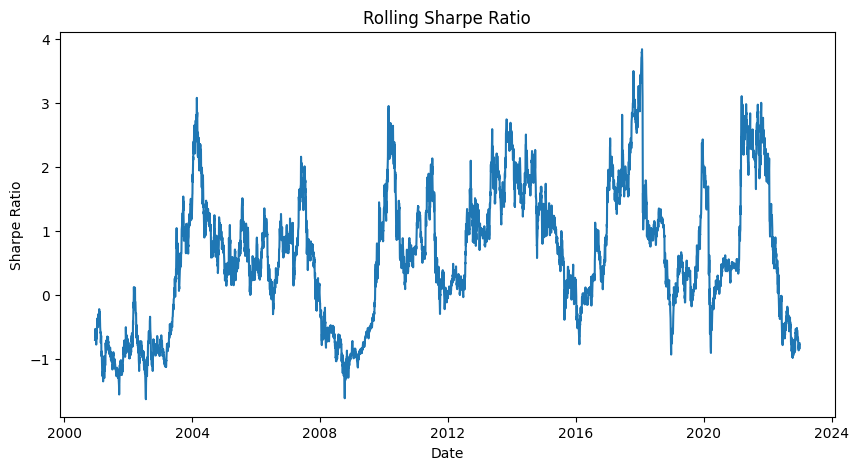

In [42]:
# Rolling Sharpe Ratio
rolling_sr = all_assets_prices['DMEquitiesUSD'].rolling(window=252).apply(compute_sr, raw=False)
plt.figure(figsize=(10, 5))
plt.plot(rolling_sr)
plt.title("Rolling Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.show()

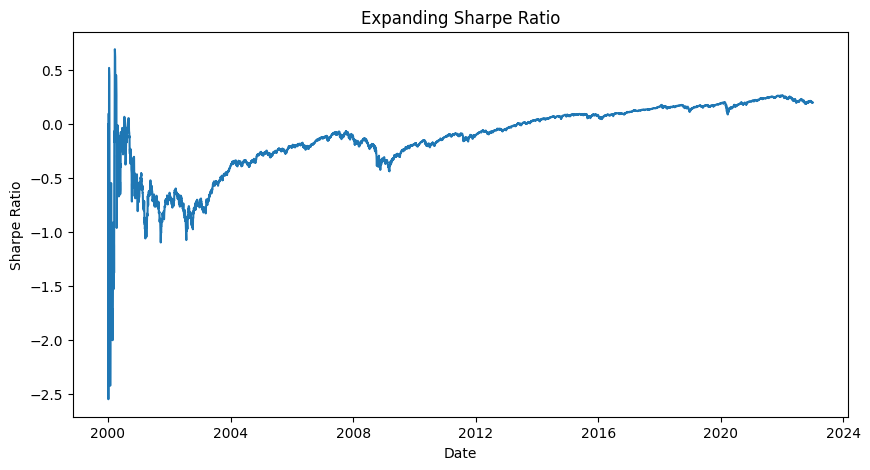

In [43]:
# Expanding Sharpe Ratio
expanding_sr = all_assets_prices['DMEquitiesUSD'].expanding().apply(compute_sr, raw=False)
expanding_sr[~np.isfinite(expanding_sr)] = 0  # Replace non-finite values with 0
plt.figure(figsize=(10, 5))
plt.plot(expanding_sr)
plt.title("Expanding Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.show()

<ipython-input-44-caf4c65bd98a>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


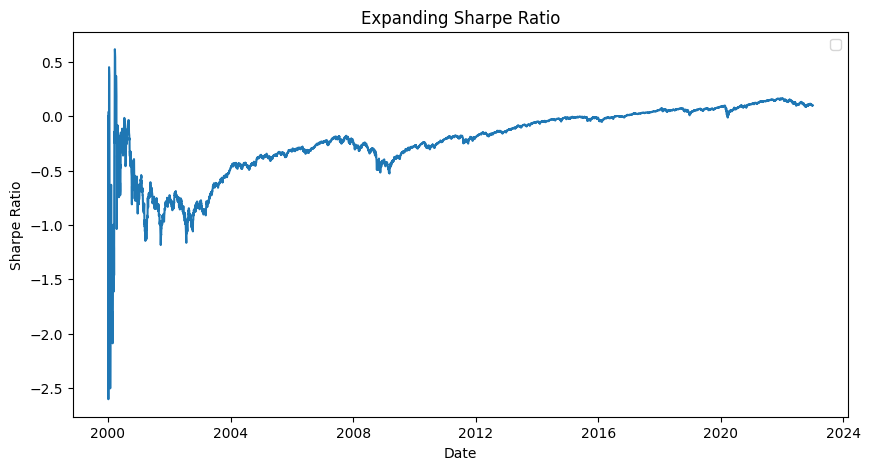

In [44]:
# Alternative way to calculate expanding Sharpe Ratio wiht lambda
expanding_sr = all_assets_prices['DMEquitiesUSD'].expanding().apply(lambda x: compute_sr(x, rf, 252), raw=False)

# Replace non-finite values with 0
expanding_sr[~np.isfinite(expanding_sr)] = 0

# Plotting the Expanding Sharpe Ratio
plt.figure(figsize=(10, 5))
plt.plot(expanding_sr)
plt.title("Expanding Sharpe Ratio")
plt.xlabel("Date")
plt.ylabel("Sharpe Ratio")
plt.legend()
plt.show()

# 4 - Calculation of Covariances and Correlations

In [45]:
# Get data
eight_assets_prices_daily = all_assets_prices_daily[['DMEquitiesEUR', 'DMEquitiesUSD',
                                                      'BondsDEM', 'BondsGBP',
                                                      'BondsUSD', 'DMFXCHF',
                                                      'DMFXEUR', 'DMFXGBP']]

# Calculate returns
returns = eight_assets_prices_daily.apply(compute_return)  # Apply: Loop for columns
returns = returns.dropna()  # Remove rows that contain NaN

In [46]:
# Covariance calculation
n = returns.shape[0]  # Number of rows
Mc = returns - returns.mean()  # Center the data: M - mean(M)
S = (Mc.T @ Mc) / (n - 1)  # Classic formula

S_check = eight_assets_prices_daily.pct_change().cov()  # Check with pandas' cov method

In [47]:
def cov_mtx(ret, ann_multiple=252):
    cmtx = ret.cov() * ann_multiple
    return cmtx

cov_matrix = cov_mtx(returns)
print("Covariance Matrix:")
print(cov_matrix)

# Verification
print("Checking Covariance Matrix:")
print(cov_mtx(returns) - S * 252)

Covariance Matrix:
               DMEquitiesEUR  DMEquitiesUSD  BondsDEM  BondsGBP  BondsUSD  \
DMEquitiesEUR       0.054230       0.026615 -0.003942 -0.004378 -0.005088   
DMEquitiesUSD       0.026615       0.037927 -0.001829 -0.002070 -0.004058   
BondsDEM           -0.003942      -0.001829  0.002420  0.002300  0.001933   
BondsGBP           -0.004378      -0.002070  0.002300  0.003593  0.002281   
BondsUSD           -0.005088      -0.004058  0.001933  0.002281  0.004660   
DMFXCHF            -0.002165      -0.000705  0.000631  0.000896  0.001223   
DMFXEUR             0.001190       0.001461 -0.000023  0.000225  0.000444   
DMFXGBP             0.003816       0.002824 -0.000176 -0.000515 -0.000008   

                DMFXCHF   DMFXEUR   DMFXGBP  
DMEquitiesEUR -0.002165  0.001190  0.003816  
DMEquitiesUSD -0.000705  0.001461  0.002824  
BondsDEM       0.000631 -0.000023 -0.000176  
BondsGBP       0.000896  0.000225 -0.000515  
BondsUSD       0.001223  0.000444 -0.000008  
DMFXCHF    

In [48]:
# Correlation calculation
Ms = (returns - returns.mean()) / returns.std()  # Centered and scaled data
R = (Ms.T @ Ms) / (n - 1)  # Classic correlation formula

def corr_mtx(ret):
    cmtx = ret.corr()  # Using pandas' corr method
    return cmtx

corr_matrix = corr_mtx(returns)
print("Correlation Matrix:")
print(corr_matrix)

# Verification
print("Checking Correlation Matrix:")
print(corr_mtx(returns) - R)

Correlation Matrix:
               DMEquitiesEUR  DMEquitiesUSD  BondsDEM  BondsGBP  BondsUSD  \
DMEquitiesEUR       1.000000       0.586850 -0.344096 -0.313609 -0.320084   
DMEquitiesUSD       0.586850       1.000000 -0.190933 -0.177340 -0.305268   
BondsDEM           -0.344096      -0.190933  1.000000  0.779935  0.575681   
BondsGBP           -0.313609      -0.177340  0.779935  1.000000  0.557375   
BondsUSD           -0.320084      -0.305268  0.575681  0.557375  1.000000   
DMFXCHF            -0.091073      -0.035480  0.125557  0.146421  0.175478   
DMFXEUR             0.055149       0.080972 -0.005136  0.040585  0.070109   
DMFXGBP             0.173157       0.153228 -0.037805 -0.090815 -0.001168   

                DMFXCHF   DMFXEUR   DMFXGBP  
DMEquitiesEUR -0.091073  0.055149  0.173157  
DMEquitiesUSD -0.035480  0.080972  0.153228  
BondsDEM       0.125557 -0.005136 -0.037805  
BondsGBP       0.146421  0.040585 -0.090815  
BondsUSD       0.175478  0.070109 -0.001168  
DMFXCHF   

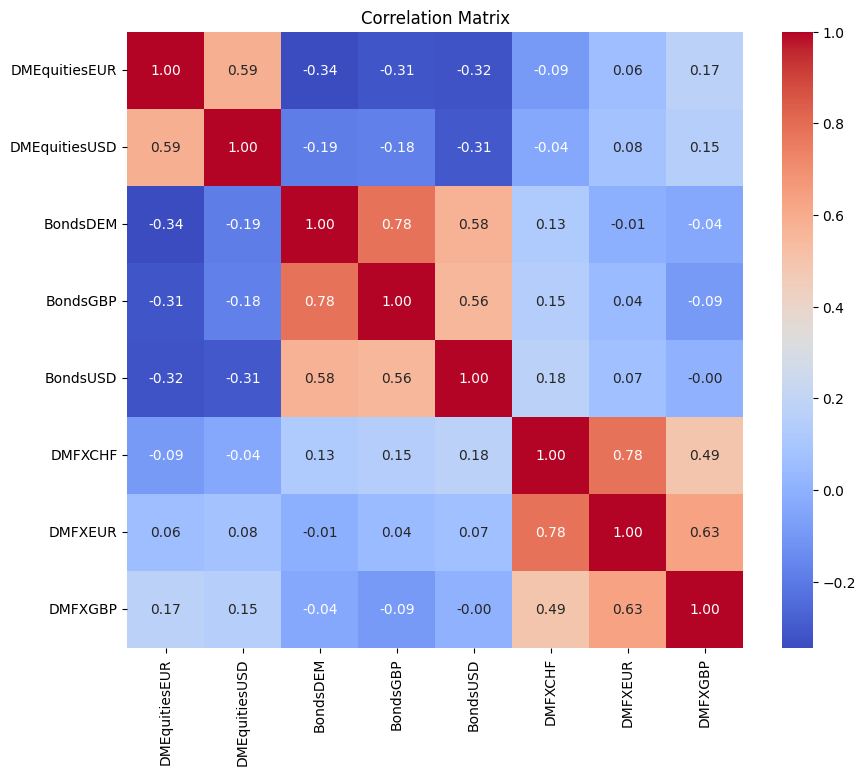

In [49]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

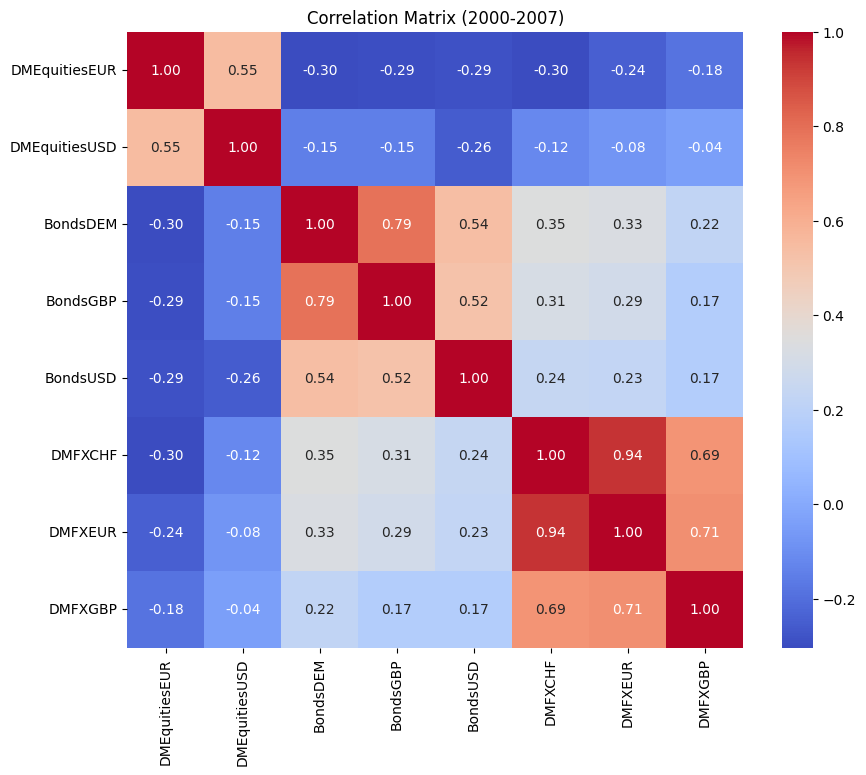

In [51]:
# Correlations on other historical data
# Example for the period 2000-2007
returns_subset1 = eight_assets_prices_daily['2000':'2007'].apply(compute_return)
rho1 = corr_mtx(returns_subset1)

plt.figure(figsize=(10, 8))
sns.heatmap(rho1, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (2000-2007)")
plt.show()

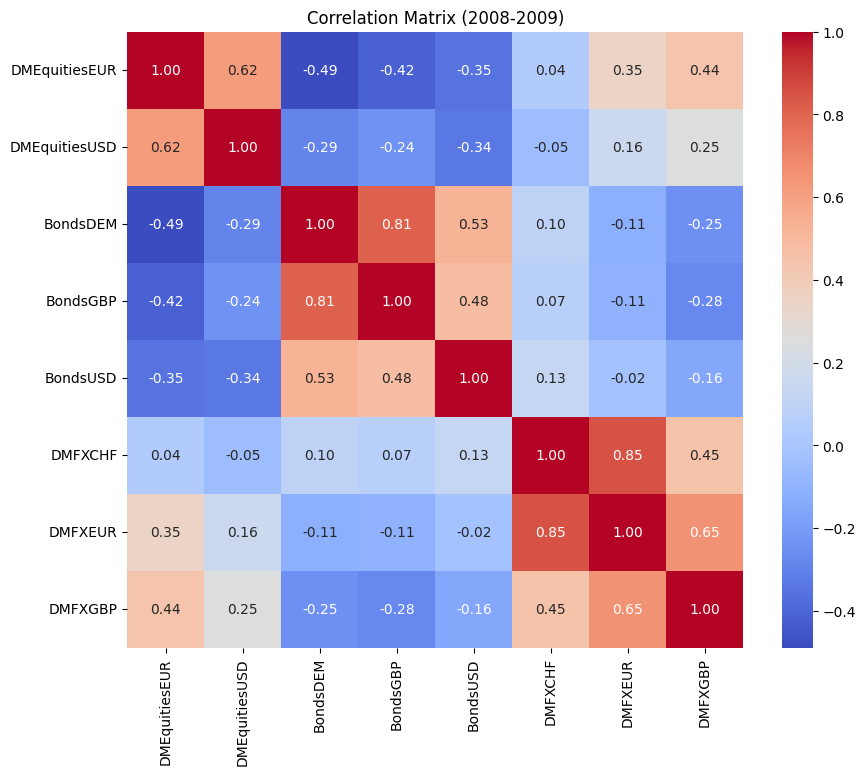

In [52]:
# Example for the period 2008-2009
returns_subset2 = eight_assets_prices_daily['2008':'2009'].apply(compute_return)
rho2 = corr_mtx(returns_subset2)

plt.figure(figsize=(10, 8))
sns.heatmap(rho2, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (2008-2009)")
plt.show()

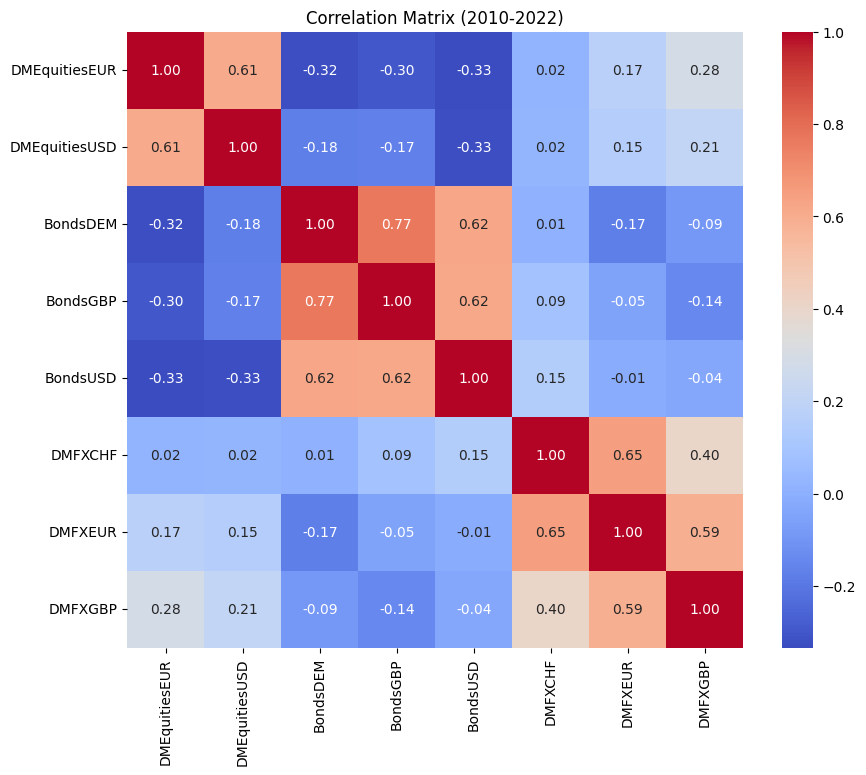

In [53]:
# Example for the period 2010-2022
returns_subset3 = eight_assets_prices_daily['2010':'2022'].apply(compute_return)
rho3 = corr_mtx(returns_subset3)

plt.figure(figsize=(10, 8))
sns.heatmap(rho3, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix (2010-2022)")
plt.show()

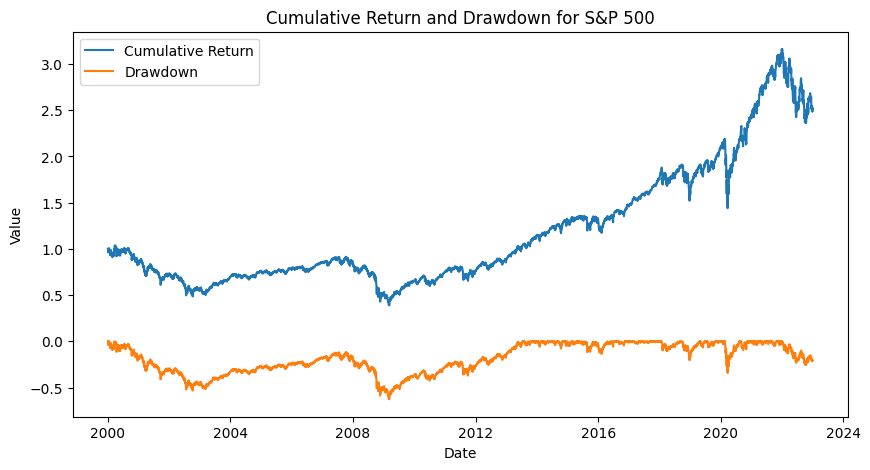

In [56]:
# Calculate Drawdown and cumulative returns for the S&P 500 index (DMEquitiesUSD)
dd_df = compute_dd_pd(all_assets_prices, 'DMEquitiesUSD')

# Plot the chart
plt.figure(figsize=(10, 5))
plt.plot(dd_df['Cumulative'], label='Cumulative Return')
plt.plot(dd_df['Drawdown'], label='Drawdown')
plt.title("Cumulative Return and Drawdown for S&P 500")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# 5 - Building Indices

## 5.1 Indices without volatility constraint

In [57]:
# Get data (Multiasset)
prices_multi_asset_daily = eight_assets_prices_daily

# Get data (Equity)
prices_equity_daily = all_assets_prices_daily[['DMEquitiesCAD', 'DMEquitiesCHF',
                                               'DMEquitiesDEM', 'DMEquitiesFRF',
                                               'DMEquitiesGBP', 'DMEquitiesJPY',
                                               'DMEquitiesNDQ', 'DMEquitiesUSD']]

In [58]:
# Calculate returns
return_multi_asset = prices_multi_asset_daily.apply(compute_return)
return_equity = prices_equity_daily.apply(compute_return)

# Calculate correlations for equities
rho_multi_asset = return_multi_asset.corr()
rho_equities = return_equity.corr()

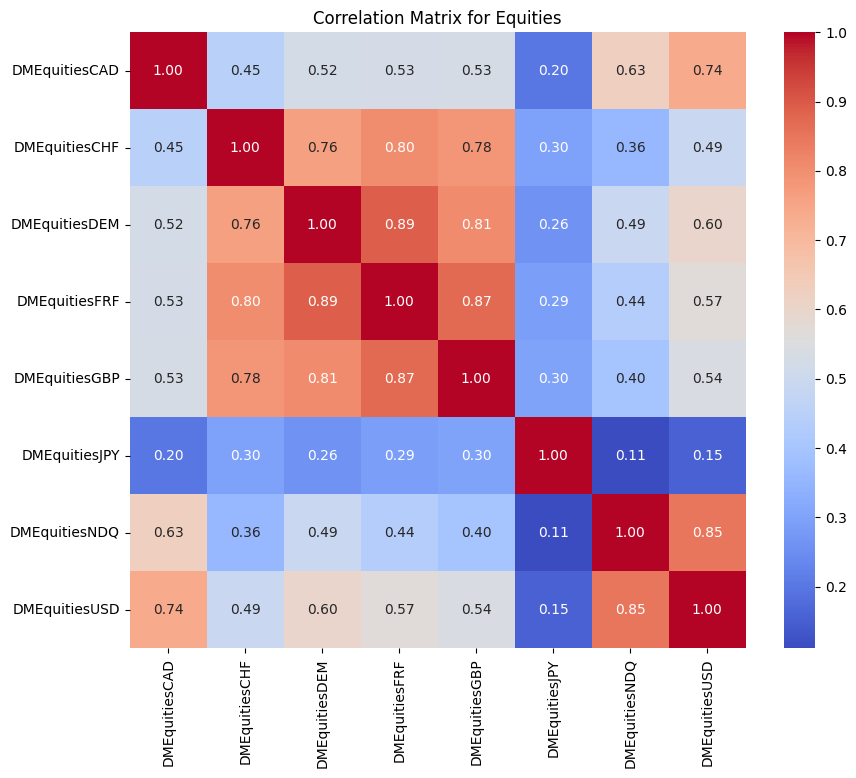

In [59]:
# Plot correlation matrix for equities
plt.figure(figsize=(10, 8))
sns.heatmap(rho_equities, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix for Equities")
plt.show()

In [61]:
# Mean correlations for equities
mean_rho_equities = rho_equities.values[np.triu_indices(rho_equities.shape[0], k=1)].mean()

# Mean correlations for multi-assets
mean_rho_multi_asset = rho_multi_asset.values[np.triu_indices(rho_multi_asset.shape[0], k=1)].mean()

print(f"Mean correlation for equities: {mean_rho_equities}")
print(f"Mean correlation for multi-assets: {mean_rho_multi_asset}")

Mean correlation for equities: 0.5231061913085935
Mean correlation for multi-assets: 0.12544557193171507


In [63]:
# Monthly correlations
return_equities_monthly = prices_equity_daily.resample('ME').last().apply(compute_return)
rho_equities_monthly = return_equities_monthly.corr()

# Mean monthly correlation for equities
mean_rho_equities_monthly = rho_equities_monthly.values[np.triu_indices(rho_equities_monthly.shape[0], k=1)].mean()
print(f"Mean correlation for equities (monthly): {mean_rho_equities_monthly}")

Mean correlation for equities (monthly): 0.7111229718228712


In [65]:
# Rebalancing dates (quarterly)
rebalancing_dates = prices_multi_asset_daily.resample('QE').last().index

# Initialize strategy returns as DataFrames
strategy_ret_ew_ma = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_ew_ma['ew_ma'] = None

strategy_ret_ew_eq = pd.DataFrame(index=return_equity.index)
strategy_ret_ew_eq['ew_eq'] = None

strategy_ret_vp_ma = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_vp_ma['vp_ma'] = None

strategy_ret_vp_eq = pd.DataFrame(index=return_equity.index)
strategy_ret_vp_eq['vp_eq'] = None


equal_weight_ma = np.repeat(1 / return_multi_asset.shape[1], return_multi_asset.shape[1])
equal_weight_eq = np.repeat(1 / return_equity.shape[1], return_equity.shape[1])

In [67]:
for index_t in range(len(rebalancing_dates) - 1):
    t = rebalancing_dates[index_t]  # Get the current rebalancing date


    # Equal weight portfolios
    weight_ew_ma = equal_weight_ma
    weight_ew_eq = equal_weight_eq

    # Data for the past year
    data_one_year_multi_asset = return_multi_asset.loc[t - pd.DateOffset(years=1):t]
    data_one_year_equity = return_equity.loc[t - pd.DateOffset(years=1):t]

    # Calculate covariance matrices and retain volatilities
    vol_ma = np.sqrt(np.var(data_one_year_multi_asset, axis = 0) * 252)  # Volatility for multi-asset
    vol_eq = np.sqrt(np.var(data_one_year_equity, axis = 0) * 252)  # Volatility for equity

    # Calculate weights for volatility parity
    weight_vp_ma = equal_weight_ma / vol_ma
    weight_vp_ma /= weight_vp_ma.sum()
    weight_vp_eq = equal_weight_eq / vol_eq
    weight_vp_eq /= weight_vp_eq.sum()

    # Rebalancing
    index_return = slice(rebalancing_dates[index_t] + pd.Timedelta(days=1),
                         rebalancing_dates[index_t + 1])

    strategy_ret_ew_ma.loc[index_return, 'ew_ma'] = return_multi_asset.loc[index_return].dot(weight_ew_ma)
    strategy_ret_ew_eq.loc[index_return, 'ew_eq'] = return_equity.loc[index_return].dot(weight_ew_eq)
    strategy_ret_vp_ma.loc[index_return, 'vp_ma'] = return_multi_asset.loc[index_return].dot(weight_vp_ma)
    strategy_ret_vp_eq.loc[index_return, 'vp_eq'] = return_equity.loc[index_return].dot(weight_vp_eq)

In [72]:
# Backtest
strategy_ret_recap = strategy_ret_ew_ma.join(strategy_ret_ew_eq.join(strategy_ret_vp_ma.join(strategy_ret_vp_eq)))
strategy_ret_recap = strategy_ret_recap.infer_objects()
strategy_ret_recap.fillna(0, inplace=True)
strategy_cumret_recap = (1+strategy_ret_recap).cumprod()

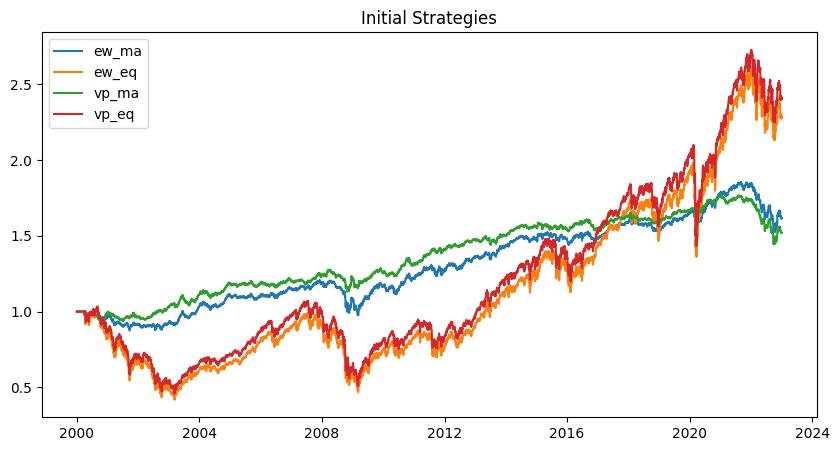

In [73]:
# Plotting the strategies
plt.figure(figsize=(10, 5))
plt.plot(strategy_cumret_recap)
plt.title("Initial Strategies")
plt.legend(strategy_ret_recap.columns)
plt.show()

In [75]:
# Print Sharpe Ratios
print('Sharpe Ratio of 4 portfolios:')
print(strategy_cumret_recap.apply(compute_sr))

Sharpe Ratio of 4 portfolios:
ew_ma    0.359866
ew_eq    0.221641
vp_ma    0.426660
vp_eq    0.242049
dtype: float64


In [76]:
# Print Volatility of 4 portfolios
print('Volatility of 4 portfolios:')
print(strategy_cumret_recap.apply(compute_vol))

Volatility of 4 portfolios:
ew_ma    0.056601
ew_eq    0.158874
vp_ma    0.041658
vp_eq    0.154979
dtype: float64


In [77]:
# Print Sharpe Ratio of equities
print('Sharpe Ratio of equities:')
print(prices_equity_daily.apply(compute_sr))

Sharpe Ratio of equities:
DMEquitiesCAD    0.229413
DMEquitiesCHF    0.183830
DMEquitiesDEM    0.072654
DMEquitiesFRF    0.094883
DMEquitiesGBP    0.075063
DMEquitiesJPY    0.083736
DMEquitiesNDQ    0.121821
DMEquitiesUSD    0.203113
dtype: float64


In [78]:
# Print Sharpe Ratio of assets in multi-asset portfolios
print('Sharpe Ratio of assets in multi-asset portfolios:')
print(prices_multi_asset_daily.apply(compute_sr))

Sharpe Ratio of assets in multi-asset portfolios:
DMEquitiesEUR    0.044139
DMEquitiesUSD    0.203113
BondsDEM         0.528062
BondsGBP         0.293642
BondsUSD         0.386587
DMFXCHF          0.063737
DMFXEUR         -0.049150
DMFXGBP         -0.096073
dtype: float64


In [79]:
# Target Volatility
TARGVOL = 0.1

In [80]:
# Initialize strategy returns as DataFrames
strategy_ret_ew_ma_tv = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_ew_ma_tv['ew_ma'] = None
strategy_ret_ew_eq_tv = pd.DataFrame(index=return_equity.index)
strategy_ret_ew_eq_tv['ew_eq'] = None
strategy_ret_vp_ma_tv = pd.DataFrame(index=return_multi_asset.index)
strategy_ret_vp_ma_tv['vp_ma'] = None
strategy_ret_vp_eq_tv = pd.DataFrame(index=return_equity.index)
strategy_ret_vp_eq_tv['vp_eq'] = None

## 5.2 Indices with target volatility

In [81]:
# Equal weights
equal_weight_ma = np.repeat(1 / return_multi_asset.shape[1], return_multi_asset.shape[1])
equal_weight_eq = np.repeat(1 / return_equity.shape[1], return_equity.shape[1])

# Rebalancing dates (assuming you have a function to get these)
rebalancing_dates = prices_multi_asset_daily.resample('QE').last().index

for index_t in range(len(rebalancing_dates) - 1):
    t = rebalancing_dates[index_t]

    # Data for the past year
    data_one_year_multi_asset = return_multi_asset.loc[t - pd.DateOffset(years=1):t]
    data_one_year_equity = return_equity.loc[t - pd.DateOffset(years=1):t]

    # Compute ex ante vol (covariance matrix)
    vcv_ma = np.cov(data_one_year_multi_asset.T)  # Covariance matrix for multi-asset
    vcv_eq = np.cov(data_one_year_equity.T)  # Covariance matrix for equity


    # Calculate volatilities using numpy
    vol_ew_ma = np.sqrt(np.dot(equal_weight_ma, np.dot(vcv_ma, equal_weight_ma)))  # Volatility for multi-asset
    vol_ew_eq = np.sqrt(np.dot(equal_weight_eq, np.dot(vcv_eq, equal_weight_eq)))  # Volatility for equity

    # Compute leverage
    lev_ew_ma = TARGVOL / vol_ew_ma
    lev_ew_eq = TARGVOL / vol_ew_eq


    # Adjust weights for target volatility
    weight_ew_ma_tv = equal_weight_ma * lev_ew_ma
    weight_ew_eq_tv = equal_weight_eq * lev_ew_eq

    # Compute covariance matrix for volatility parity
    vol_ma = np.sqrt(np.var(data_one_year_multi_asset, axis=0) * 252)  # Use variance for annualized volatility
    vol_eq = np.sqrt(np.var(data_one_year_equity, axis=0) * 252)  # Use variance for annualized volatility

    weight_vp_ma = equal_weight_ma / vol_ma
    weight_vp_ma /= weight_vp_ma.sum()
    weight_vp_eq = equal_weight_eq / vol_eq
    weight_vp_eq /= weight_vp_eq.sum()

    vol_vp_ma = np.sqrt(np.dot(weight_vp_ma, np.dot(vcv_ma, weight_vp_ma)))
    vol_vp_eq = np.sqrt(np.dot(weight_vp_eq, np.dot(vcv_eq, weight_vp_eq)))

    # Compute leverage for volatility parity
    lev_vp_ma = TARGVOL / vol_vp_ma
    lev_vp_eq = TARGVOL / vol_vp_eq

    weight_vp_ma_tv = weight_vp_ma * lev_vp_ma
    weight_vp_eq_tv = weight_vp_eq * lev_vp_eq

    # Assign returns for the index range
    # Rebalancing
    index_return = slice(rebalancing_dates[index_t] + pd.Timedelta(days=1),
                         rebalancing_dates[index_t + 1])

    strategy_ret_ew_ma_tv.loc[index_return, 'ew_ma'] = return_multi_asset.loc[index_return].dot(weight_ew_ma_tv)
    strategy_ret_ew_eq_tv.loc[index_return, 'ew_eq'] = return_equity.loc[index_return].dot(weight_ew_eq_tv)
    strategy_ret_vp_ma_tv.loc[index_return, 'vp_ma'] = return_multi_asset.loc[index_return].dot(weight_vp_ma_tv)
    strategy_ret_vp_eq_tv.loc[index_return, 'vp_eq'] = return_equity.loc[index_return].dot(weight_vp_eq_tv)

In [88]:
# Backtest
strategy_ret_recap_tv = strategy_ret_ew_ma_tv.join(strategy_ret_ew_eq_tv.join(strategy_ret_vp_ma_tv.join(strategy_ret_vp_eq_tv)))
strategy_ret_recap_tv = strategy_ret_recap_tv.infer_objects()
strategy_ret_recap_tv.fillna(0, inplace=True)
strategy_cumret_recap_tv = (1+strategy_ret_recap_tv).cumprod()

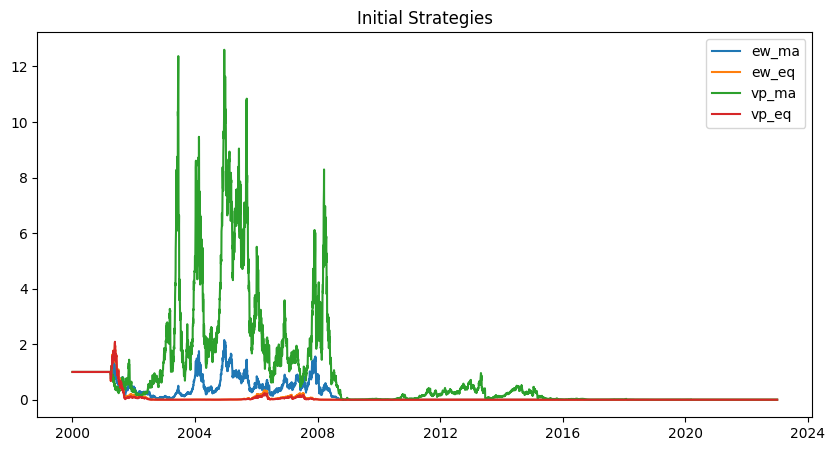

In [83]:
# Plotting the strategies
plt.figure(figsize=(10, 5))
plt.plot(strategy_cumret_recap_tv)
plt.title("Initial Strategies")
plt.legend(strategy_ret_recap_tv.columns)
plt.show()

In [84]:
# Print Sharpe Ratios
print('Sharpe Ratio of 4 portfolios:')
print(strategy_cumret_recap_tv.apply(compute_sr))

Sharpe Ratio of 4 portfolios:
ew_ma   -0.367686
ew_eq   -0.351842
vp_ma   -0.303719
vp_eq         NaN
dtype: float64


<ipython-input-33-04cfc8fa06ed>:4: RuntimeWarning: invalid value encountered in scalar power
  cagr = (price.iloc[-1] / price.iloc[0]) ** (ann_multiple / n) - 1


In [85]:
# Print Volatility of 4 portfolios
print('Volatility of 4 portfolios:')
print(strategy_cumret_recap_tv.apply(compute_vol))

Volatility of 4 portfolios:
ew_ma    1.801383
ew_eq    1.783916
vp_ma    1.746820
vp_eq    1.819356
dtype: float64


In [86]:
# Print Sharpe Ratio of equities
print('Sharpe Ratio of equities:')
print(prices_equity_daily.apply(compute_sr))

Sharpe Ratio of equities:
DMEquitiesCAD    0.229413
DMEquitiesCHF    0.183830
DMEquitiesDEM    0.072654
DMEquitiesFRF    0.094883
DMEquitiesGBP    0.075063
DMEquitiesJPY    0.083736
DMEquitiesNDQ    0.121821
DMEquitiesUSD    0.203113
dtype: float64


In [87]:
# Print Sharpe Ratio of assets in multi-asset portfolios
print('Sharpe Ratio of assets in multi-asset portfolios:')
print(prices_multi_asset_daily.apply(compute_sr))

Sharpe Ratio of assets in multi-asset portfolios:
DMEquitiesEUR    0.044139
DMEquitiesUSD    0.203113
BondsDEM         0.528062
BondsGBP         0.293642
BondsUSD         0.386587
DMFXCHF          0.063737
DMFXEUR         -0.049150
DMFXGBP         -0.096073
dtype: float64


# 6 - A first model

In [94]:
# Read the CSV file
model_assets_prices = pd.read_csv(f"{mainpath}DataForModelTutorial1.csv", index_col='Dates', sep=';', parse_dates=['Dates'], dayfirst=True)

In [95]:
model_assets_prices.head()

,US10Y,CorePCE,Unemployment,FedFunds,ED2,ED6
Dates,,,,,,
1986-06-30,7.321,3.47487,7.2,6.88,77.899,75.951
1986-07-31,7.275,3.35909,7.0,6.38,78.268,75.477
1986-08-31,6.919,3.06802,6.9,5.88,78.939,75.837
1986-09-30,7.421,3.19417,7.0,5.88,78.587,75.362
1986-10-31,7.321,3.37644,7.0,5.88,78.796,75.608


In [97]:
# Transformations
model_assets_prices_for_model = model_assets_prices.copy()

# These columns should be derived from the data or calculations
model_assets_prices_for_model['CorePCE'] = model_assets_prices_for_model['CorePCE']  # Assuming 'PCE' is available
model_assets_prices_for_model['Unemployment'] = model_assets_prices_for_model['Unemployment']  # Assuming 'UnemploymentRate' is available
model_assets_prices_for_model['EDSpread'] = model_assets_prices_for_model['ED2'] - model_assets_prices_for_model['ED6']  # Assuming 'ED2' and 'ED6' are available

In [98]:
# Prepare inputs for OLS
inputs = pd.DataFrame({
    'CorePCE': model_assets_prices_for_model['CorePCE'],
    'Unemployment': model_assets_prices_for_model['Unemployment'],
    'EDSpread': model_assets_prices_for_model['EDSpread'],
    'FedFunds': model_assets_prices_for_model['FedFunds']
})

In [99]:
# Full history OLS regression
data_for_ols = pd.DataFrame({'y': model_assets_prices_for_model['US10Y'], **inputs})
X = sm.add_constant(data_for_ols.drop(columns='y'))  # Add constant for intercept
lin_model_full = sm.OLS(data_for_ols['y'], X).fit()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1293.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          1.53e-239
Time:                        15:44:01   Log-Likelihood:                -425.29
No. Observations:                 439   AIC:                             860.6
Df Residuals:                     434   BIC:                             881.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0841      0.151     -0.557   

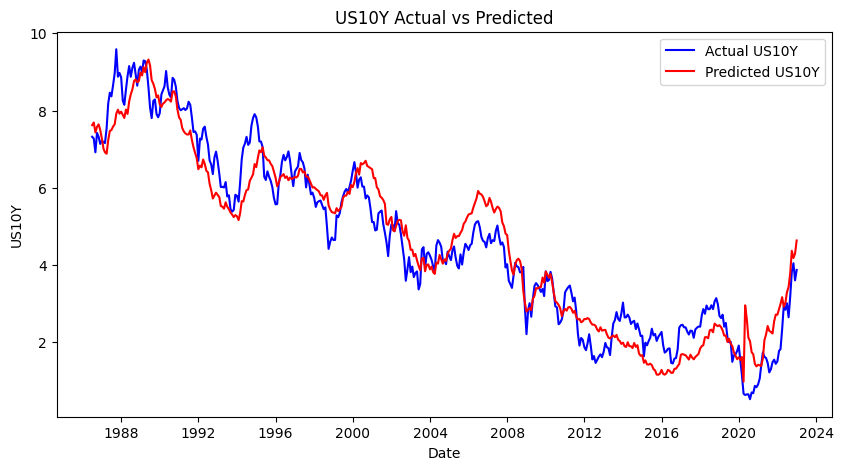

In [100]:
# Summary of the full model
print(lin_model_full.summary())

# Predictions
data_for_ols['US10Yhat'] = lin_model_full.predict(X)

# Quick and dirty chart
plt.figure(figsize=(10, 5))
plt.plot(data_for_ols.index, data_for_ols['y'], label='Actual US10Y', color='blue')
plt.plot(data_for_ols.index, data_for_ols['US10Yhat'], label='Predicted US10Y', color='red')
plt.title('US10Y Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('US10Y')
plt.legend()
plt.show()

In [101]:
# Last 10 years OLS regression
last_10_years = data_for_ols.tail(10 * 252)  # Assuming 252 trading days per year
X_last_10y = sm.add_constant(last_10_years.drop(columns=['y', 'US10Yhat']))
lin_model_last_10y = sm.OLS(last_10_years['y'], X_last_10y).fit()

# Summary of the last 10 years model
print(lin_model_last_10y.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1293.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          1.53e-239
Time:                        15:44:29   Log-Likelihood:                -425.29
No. Observations:                 439   AIC:                             860.6
Df Residuals:                     434   BIC:                             881.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0841      0.151     -0.557   

In [102]:
# Last 5 years OLS regression
last_5_years = data_for_ols.tail(5 * 252)  # Assuming 252 trading days per year
X_last_5y = sm.add_constant(last_5_years.drop(columns=['y', 'US10Yhat']))
lin_model_last_5y = sm.OLS(last_5_years['y'], X_last_5y).fit()

# Summary of the last 5 years model
print(lin_model_last_5y.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1293.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):          1.53e-239
Time:                        15:44:40   Log-Likelihood:                -425.29
No. Observations:                 439   AIC:                             860.6
Df Residuals:                     434   BIC:                             881.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0841      0.151     -0.557   